# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [141]:
df = pd.read_csv("orders.csv")
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [142]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_value       0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [143]:
df["order_value"].mean()

3145.128

<AxesSubplot:ylabel='Frequency'>

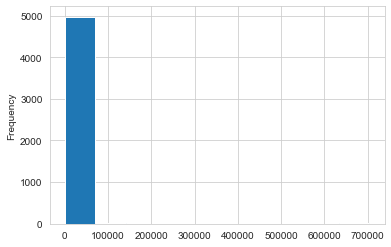

In [144]:
#histogram of order values
df["order_value"].plot.hist()

Text(0.5, 1.0, 'Order value vs total items')

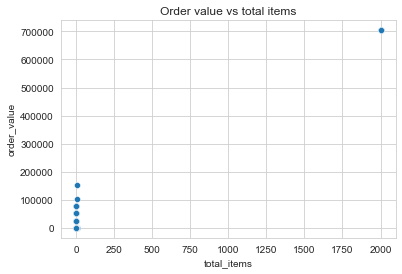

In [145]:
#graphing order value vs amount of items in the order
sns.scatterplot(x="total_items", y="order_value", data=df)
plt.title("Order value vs total items")

Outliers of 2000 item orders that have values of over 700000

In [146]:
df["order_value"].max()

704000

The graphs show that there are customers that are buying a ton of items in one order, making their order value very high. Taking the average of the order values would go wrong because of these customers that are buying a ton of items, which obviously results in a huge order value, causing the calulation of the AOV to increase significantly. It's not right to calculate AOV by only looking at order value because of the different amount of items people buy in each order. 

In [147]:
#divide order_value by total_items to calculate average value of an item in the order
df["value_per_item"] = df["order_value"]/df["total_items"]
df.head(3)

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at,value_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0


In [148]:
print("Average order value per item:", df["value_per_item"].mean())

Average order value per item: 387.7428


In [149]:
df["value_per_item"].max()

25725.0

I think a metric that better represents the customers is taking the average value per item, instead of the average order value as a whole. By using average value per item, it accounts for the variation in order sizes. The average order value per item is $387.74. There are still some outliers of really high values, like some customers spending 25725 on one item, but I think the average order value per item is definitely still better than the result of taking average order value.

In [150]:
df.dtypes["created_at"]

dtype('O')

In [151]:
#convert created_at into datetime objects
df["created_at"] = pd.to_datetime(df["created_at"])

#make an hour column
df["hour"] = df["created_at"].dt.hour

df.head(3)

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at,value_per_item,hour
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,12
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,17
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0,4


Text(0.5, 1.0, 'Number of orders placed vs hour')

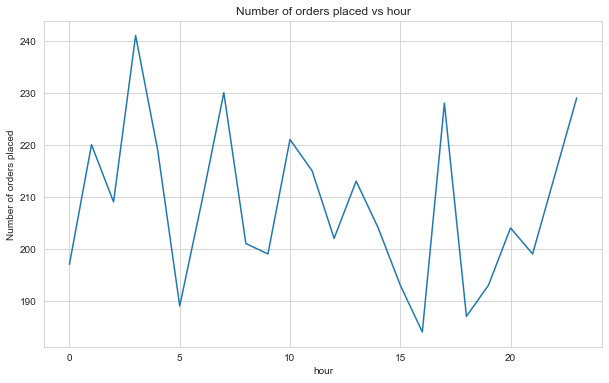

In [152]:
#calculate number of orders placed for each hour
orders_per_hour = df.groupby("hour").size().to_frame().reset_index()
orders_per_hour.columns = ["hour", "order_count"]

#graph amount of orders placed against each hour
plt.figure(figsize=(10,6))
sns.lineplot(x="hour", y="order_count", data=orders_per_hour)
plt.ylabel("Number of orders placed")
plt.title("Number of orders placed vs hour")

When plotting the number of orders placed for each hour, there doesn't seem to be an obvious trend. The data points are all over the place, with the greatest number of orders being placed around 4 am which seems strange. People visit the site at all hours throughout the day, and there isn't really a specific range of time that everyone is placing orders at.